In [1]:
import pandas as pd
online=pd.read_csv("OrderData.csv")

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
####把退貨資料排除在RFM資料之外
online=online[online["TotalSalesAmount"]>0]
online.head()

,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,MemberID
0,TG190926B00185,2019-09-26 01:15:10.297,OfficialECom,MobileWeb,JKOPay,Home,1,1,680,680,0,0,0,0,Finish,JAE7ypAI%2BmBkMAd1REpPJI3zcEQBI9WBTeg5QlsEri4%3D
1,TG190926X00450,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,4,4,2660,2760,-100,0,-100,0,Finish,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D
2,TG190928M00620,2019-09-28 11:31:04.847,OfficialECom,MobileWeb,JKOPay,FamilyPickup,1,1,1016,1280,-264,-64,-200,0,Finish,rKUVLmkXyUqqVN8zU1UB40kuhBLRok8FvQtDZTGIS00%3D
3,TG190928U00383,2019-09-28 18:23:28.130,OfficialECom,iOSApp,JKOPay,FamilyPickup,1,1,1380,1480,-100,0,-100,0,Finish,WpUUri%2BOuznMIisbG5ramILffQkqoQr8TPOj0L8lqN8%3D
4,TG190929R00721,2019-09-29 15:29:56.730,OfficialECom,MobileWeb,JKOPay,FamilyPickup,1,1,1780,1880,-100,0,-100,0,Cancel,acrdzjptXw%2FDeckXY4b5R89lYb41BC0H0bEgiTo9Zj8%3D


In [3]:
print("總共有幾位顧客: ",len(pd.unique(online["MemberID"])))
print("總共有幾筆資料: ",online.shape[0])

總共有幾位顧客:  190320
總共有幾筆資料:  400242


In [4]:
online["TradesDateTime"]=online['TradesDateTime'].apply(lambda x:x[:10])

In [5]:
temp=pd.DataFrame(online.groupby(["MemberID","TradesDateTime"])["TotalSalesAmount"].sum()).reset_index()
temp.head()

,MemberID,TradesDateTime,TotalSalesAmount
0,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,2019-06-26,2850
1,%2B%2B2Sw%2FYbIovLROVPDc%2BeVjbEdn6fTeg7niPBE%...,2018-05-26,1380
2,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,2019-04-12,3160
3,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,2019-04-22,2080
4,%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B...,2019-09-04,1900


In [6]:
#RFM
#最近一次消費（Recency）：指消費者至今再次購買與上次購買產品的時間差
#消費金額（Monetary）：指消費者在一定期間內購買該產品的總金額
#消費頻率（Frequency）：指消費者在一定期間內購買該產品的次數

from datetime import datetime 
import datetime as dt
snapshot_date = pd.to_datetime(online.TradesDateTime).max() + dt.timedelta(days=1)
snapshot_date=datetime.strptime(str(snapshot_date), "%Y-%m-%d %H:%M:%S")
snapshot_date=pd.to_datetime(snapshot_date)
print(snapshot_date)

2020-05-01 00:00:00


In [7]:
datamart = temp.groupby(['MemberID']).agg({
'TradesDateTime': lambda x: (snapshot_date-pd.to_datetime(x).max()).days,'TotalSalesAmount': 'sum','MemberID':'size'})

# Rename columns for easier interpretation
datamart.rename(columns = {'TradesDateTime': 'Recency'
,'MemberID': 'Frequency',
'TotalSalesAmount': 'MonetaryValue'}, inplace=True)
datamart.head()

,Recency,MonetaryValue,Frequency
MemberID,,,
%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf909HvCU%3D,310,2850,1
%2B%2B2Sw%2FYbIovLROVPDc%2BeVjbEdn6fTeg7niPBE%2FeJJKo%3D,706,1380,1
%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN7YY%3D,375,5240,2
%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B%2Bt4%3D,240,1900,1
%2B%2B6Xs%2FwHblxbDDDYQ9osx6DMUooacHVpAJvv7KWgf3o%3D,1408,1280,1


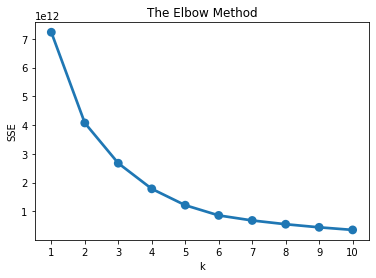

In [8]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [9]:
import numpy as np
wcss = sse
distances = []
for i in range(1,11):
    p1 = np.array([1,wcss[1]])
    p2 = np.array([10,wcss[10]])
    p = np.array([i,wcss[i]])
    distances.append(np.abs(np.cross(p2-p1,p-p1))/np.linalg.norm(p2-p1))
print(list(wcss.keys())[np.argmax(distances)])

4


In [10]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(datamart)
cluster_labels = kmeans.labels_
datamart_rfm_k4 = datamart.assign(Cluster = cluster_labels)
di={3:1,2:2,0:3,1:4}
datamart_rfm_k4["Cluster"]=datamart_rfm_k4["Cluster"].map(di)
datamart_rfm_k4.groupby(['Cluster']).agg({'Recency': 'median','Frequency': 'median','MonetaryValue': ['median','count']}).round(1)

Recency Frequency MonetaryValue        
         median    median        median   count
Cluster                                        
1             8        70      224798.5      16
2            85        15       38512.0    1480
3           228         5       10481.0   20557
4           727         1        1980.0  168267

>Cluster 1 :The customers can be said to be VVIP customers. R, F, and M are all super ideal, but only 16 people.

>Cluster 2 :Consumers have shopping records within three months (and the previous shopping frequency was high),the company should pay attention on them and stimulate them to spend again.

>Cluster 3 :There were some buying records for the customers in this group within this year, but according to the two variables of R and F, we can tell that they may become potential lost customers , and the company should find ways to recover them in order to reduce churn rate.

>Cluster 4:Consumer hasn’t made a purchase for more than two years.Therefore,I suggest to skip them when we do further analysis.

In [11]:
member=pd.read_csv("MemberData.csv")
member.head()

,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,MemberCardLevel,MemberID,eland_uuid
0,iOSApp,2014-12-27 22:28:04.600,Female,1983-10-19,True,True,True,True,10,b%2Be6RCNYUwTRO%2BnSBeE4H7ySets9zgOaGkqDYItQZS...,NaN
1,NaN,2015-05-29 14:37:20.977,Female,1990-03-13,True,True,True,True,10,%2FL156mdTEuzDIF5ulSFL4mhJdNRGs8haMhCgz%2BSrG9...,NaN
2,NaN,2013-10-23 12:08:51.540,NaN,1900-01-01,True,True,True,True,10,wj5w28khA7PlMGGXYaUHIfTxKhjae8pnB76k46OL%2Bhc%3D,NaN
3,NaN,2015-06-27 21:15:07.690,Female,1977-03-14,True,True,True,True,10,rvJ4K4pF5BYUVUVZnRdcsc0AMlVLX0T2warN0CyPKmU%3D,NaN
4,NaN,2015-06-03 11:04:27.593,Female,1983-01-15,True,True,True,True,10,Oalq5zcQazy%2B%2BnozogEXMbTItDObkJMUPzz4H%2Fn7...,NaN


In [12]:
datamart_rfm_k4=datamart_rfm_k4.reset_index()
datamart_rfm_k4.head()

,MemberID,Recency,MonetaryValue,Frequency,Cluster
0,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,310,2850,1,4
1,%2B%2B2Sw%2FYbIovLROVPDc%2BeVjbEdn6fTeg7niPBE%...,706,1380,1,4
2,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,375,5240,2,4
3,%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B...,240,1900,1,4
4,%2B%2B6Xs%2FwHblxbDDDYQ9osx6DMUooacHVpAJvv7KWg...,1408,1280,1,4


In [13]:
member_new=pd.merge(member,datamart_rfm_k4,how="inner",left_on="MemberID",right_on="MemberID")
member_new.head()

,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,MemberCardLevel,MemberID,eland_uuid,Recency,MonetaryValue,Frequency,Cluster
0,iOSApp,2014-12-27 22:28:04.600,Female,1983-10-19,True,True,True,True,10,b%2Be6RCNYUwTRO%2BnSBeE4H7ySets9zgOaGkqDYItQZS...,NaN,885,6138,3,4
1,NaN,2013-10-23 12:08:51.540,NaN,1900-01-01,True,True,True,True,10,wj5w28khA7PlMGGXYaUHIfTxKhjae8pnB76k46OL%2Bhc%3D,NaN,2382,87,1,4
2,iOSApp,2016-01-07 17:09:35.463,Female,1992-03-15,True,True,True,True,10,OmQZ8Kx6iRoCneeGsxdNR8ZCp79U%2FoNZaMwthMGfi2Y%3D,NaN,1472,5059,3,4
3,Web,2015-10-26 21:35:09.243,Female,1981-06-16,True,True,True,True,10,koEAsczymT5W4nXx7V577osQQSBhDIMv6Jt%2Fv64hRwo%3D,NaN,931,2589,2,4
4,Web,2015-10-05 21:04:11.247,NaN,1900-01-01,False,True,True,True,10,oS5gPKjc9ZWvRHgi6UA36yZOvjPqjrGUF5ZRVcS7NWA%3D,NaN,1659,2960,2,4


In [14]:
member_new["Birthday"]=member_new["Birthday"].apply(lambda x:x.replace("0001-01-01","1900/1/1"))
member_new["Birthday"]=member_new["Birthday"].apply(lambda x:"19"+x[2:] if x.split("/")[0][:2]=="00" else x)
member_new=member_new[member_new["Birthday"]!="1900-01-01"]
member_new["Birthday"]=member_new["Birthday"].apply(lambda x:pd.to_datetime(x).year)
member_new["Age"]=2020-member_new["Birthday"]
member_new.head()

,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,MemberCardLevel,MemberID,eland_uuid,Recency,MonetaryValue,Frequency,Cluster,Age
0,iOSApp,2014-12-27 22:28:04.600,Female,1983,True,True,True,True,10,b%2Be6RCNYUwTRO%2BnSBeE4H7ySets9zgOaGkqDYItQZS...,NaN,885,6138,3,4,37
2,iOSApp,2016-01-07 17:09:35.463,Female,1992,True,True,True,True,10,OmQZ8Kx6iRoCneeGsxdNR8ZCp79U%2FoNZaMwthMGfi2Y%3D,NaN,1472,5059,3,4,28
3,Web,2015-10-26 21:35:09.243,Female,1981,True,True,True,True,10,koEAsczymT5W4nXx7V577osQQSBhDIMv6Jt%2Fv64hRwo%3D,NaN,931,2589,2,4,39
5,iOSApp,2015-10-17 22:29:02.463,Female,1987,True,True,True,True,10,4BqjDQMZYgngwZUAKsFqfNDdfM0ilwfXE7D4zVFDCEo%3D,NaN,1649,2370,1,4,33
6,iOSApp,2015-11-15 21:54:21.237,Female,1991,True,True,True,True,10,wuz2oecdr%2BGF12u3i30%2BPg97%2Bkm9sMu%2B9diNBQ...,NaN,159,3079,1,4,29


In [15]:
member_new=member_new[member_new["Age"]<90]
member_new=member_new[member_new["Age"]>8]

In [16]:
bins = [0, 18, 25, 35, 45, 55, 65,max(member_new["Age"])]
labels = ["<=18","19-25","26-35","36-45","46-55","56-65",">=66"]
member_new['New_age'] = pd.cut(member_new['Age'], bins=bins, labels=labels)

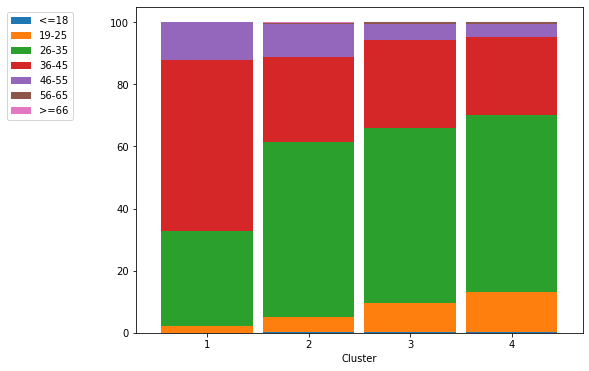

In [17]:
%matplotlib inline
from matplotlib import cm
ax= pd.crosstab(member_new['New_age'], member_new['Cluster']).apply(lambda r: r/r.sum()*100, axis=0)
ax_1=ax.T.plot.bar(figsize=(8,6),stacked=True, rot=0,width=0.9)
ax_1.legend(bbox_to_anchor=(-0.3, 1),loc="upper left")
plt.show()

In [18]:
online=pd.read_csv("OrderData.csv")
online=pd.merge(online,datamart_rfm_k4,how="inner",left_on="MemberID",right_on="MemberID")
online.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,MemberID,Recency,MonetaryValue,Frequency,Cluster
0,TG190926B00185,2019-09-26 01:15:10.297,OfficialECom,MobileWeb,JKOPay,Home,1,1,680,680,0,0,0,0,Finish,JAE7ypAI%2BmBkMAd1REpPJI3zcEQBI9WBTeg5QlsEri4%3D,218,680,1,4
1,TG190926X00450,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,4,4,2660,2760,-100,0,-100,0,Finish,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D,218,2660,1,4
2,TG190928M00620,2019-09-28 11:31:04.847,OfficialECom,MobileWeb,JKOPay,FamilyPickup,1,1,1016,1280,-264,-64,-200,0,Finish,rKUVLmkXyUqqVN8zU1UB40kuhBLRok8FvQtDZTGIS00%3D,216,19744,8,3
3,TG180222L00814,2018-02-22 10:43:45.913,OfficialECom,AndroidApp,Family,Family,5,5,3142,3360,-218,-218,0,0,Finish,rKUVLmkXyUqqVN8zU1UB40kuhBLRok8FvQtDZTGIS00%3D,216,19744,8,3
4,TG180222L00581,2018-02-22 10:32:35.800,OfficialECom,MobileWeb,Family,Family,5,5,3142,3360,-218,-218,0,0,Cancel,rKUVLmkXyUqqVN8zU1UB40kuhBLRok8FvQtDZTGIS00%3D,216,19744,8,3


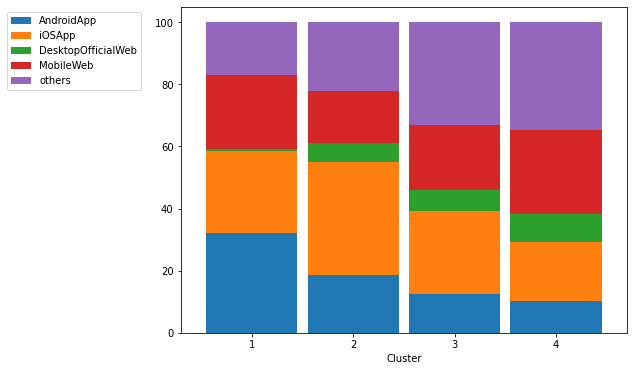

In [19]:
online["ChannelDetail"]=online["ChannelDetail"].apply(lambda x: "others" if str(x).isdigit() else x)
ax= pd.crosstab(online['ChannelDetail'], online['Cluster']).apply(lambda r: r/r.sum()*100, axis=0)
ax=ax.reindex(["AndroidApp","iOSApp","DesktopOfficialWeb","MobileWeb","others"])
ax_1=ax.T.plot.bar(figsize=(8,6),stacked=True, rot=0,width=0.9)
ax_1.legend(bbox_to_anchor=(-0.4, 1),loc="upper left")
plt.show()

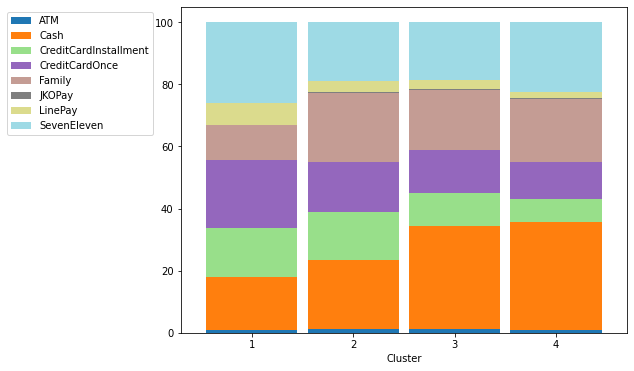

In [20]:
cmap = cm.get_cmap('tab20')
ax= pd.crosstab(online['PaymentType'], online['Cluster']).apply(lambda r: r/r.sum()*100, axis=0)
ax_1=ax.T.plot.bar(figsize=(8,6),stacked=True, rot=0,width=0.9,cmap=cmap)
ax_1.legend(bbox_to_anchor=(-0.4, 1),loc="upper left")
plt.show()

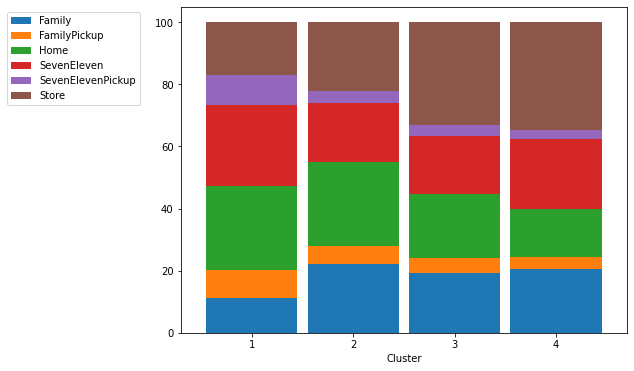

In [21]:
ax= pd.crosstab(online['ShippingType'], online['Cluster']).apply(lambda r: r/r.sum()*100, axis=0)
ax_1=ax.T.plot.bar(figsize=(8,6),stacked=True, rot=0,width=0.9)
ax_1.legend(bbox_to_anchor=(-0.4, 1),loc="upper left")
plt.show()

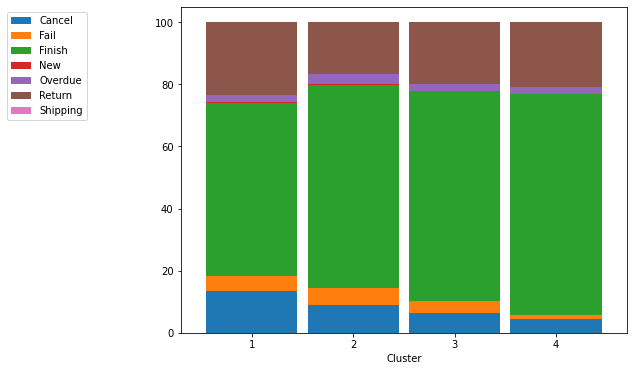

In [22]:
ax= pd.crosstab(online['Status'], online['Cluster']).apply(lambda r: r/r.sum()*100, axis=0)
ax_1=ax.T.plot.bar(figsize=(8,6),stacked=True, rot=0,width=0.9)
ax_1.legend(bbox_to_anchor=(-0.4, 1),loc="upper left")
plt.show()

In [24]:
datamart_rfm_k4.to_csv("rfm.csv")

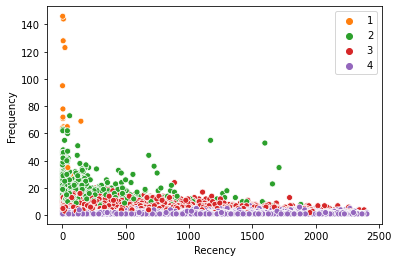

In [26]:
palette ={1:"C1",2:"C2",3:"C3",4:"C4"}
sns.scatterplot(x='Recency', y='Frequency', data=datamart_rfm_k4, hue=datamart_rfm_k4['Cluster'].tolist(),palette=palette)

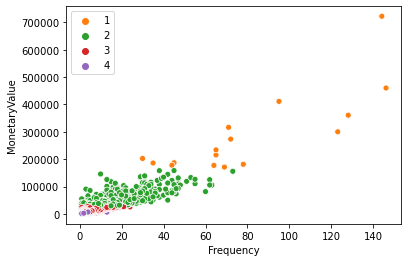

In [27]:
palette ={1:"C1",2:"C2",3:"C3",4:"C4"}
sns.scatterplot(x='Frequency', y='MonetaryValue', data=datamart_rfm_k4, hue=datamart_rfm_k4['Cluster'].tolist(), palette=palette)

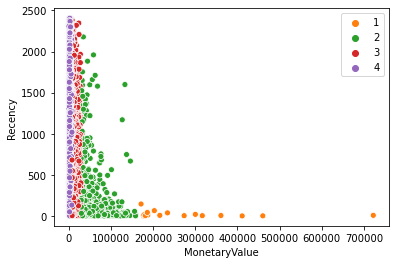

In [28]:
palette ={1:"C1",2:"C2",3:"C3",4:"C4"}
sns.scatterplot(x='MonetaryValue', y='Recency', data=datamart_rfm_k4, hue=datamart_rfm_k4['Cluster'].tolist(), palette=palette)